### **Airbnb Listings Bangkok**

## Mengenai Dataset

#### 


Airbnb merupakan platform online yang memfasilitasi penyewaan tempat tinggal di seluruh dunia. Terdapat berbagai tipe tempat tinggal, mulai dari rumah, apartemen, kamar, hingga villa yang dapat disewa sesuai preferensi para tamu. Airbnb sangat mudah ditemukan di berbagai kota dan negara, salah satunya di Bangkok, Thailand. Dataset ini mengungkapkan Airbnb Listing di Bangkok yang memberi detail mengenai tipe kamar, ulasan dari para tamu, persebaran penginapan di Bangkok. Pada dataset ini, ditemukan ulasan yang buruk atau tidak ada review sama sekali yang mengakibatkan kehilangan kepercayaan terhadap potensial tamu. Oleh karena itu, analisis ini akan memberikan gambaran bagi Airbnb Bangkok dalam memperbaiki kebijakan yang lebih baik bagi Airbnb Bangkok, penyewa/host, dan para tamu.

## Stakeholder

#### C-level eksekutif di Airbnb Bangkok

## Permasalahan dan Goals

####
- Permasalahan:
1. Tamu tidak memberikan ulasan setelah check-out
2. Kurangnya ulasan mengakibatkan host kesulitan untuk meningkatkan kualitas unit mereka
3. Ulasan buruk atau tidak ada ulasan dari tamu dapat merusak reputasi Airbnb dan kurangnya kepercayaan di kalangan calon tamu

- Goals:
1. Membantu host dalam mengidentifikasi peningkatan kualitas penawaran mereka
2. Kebijakan untuk mewajibkan tamu memberikan ulasan
3. Bertujuan untuk terus memperbaiki pengalaman bagi host/penyewa dan tamu di platform
 
- Insights: 
1. Top 5 Penginapan berdasarkan Distrik
2. Top 5 Distrik dengan Total Ulasan Terendah
3. Room Type dan Minimum Malam di  50  Distrik Bangkok
4. Distribusi Distrik berdasarkan Review Category
5. Distrik dengan Review Category
6. Host ID di Vadhana yang Memiliki Review Category 'Tidak Ada Review' dan 'Sangat Buruk'
7. Host ID di Ratchathewi yang Menerima Jumlah Ulasan Terendah (12 Bulan Terakhir)

Hasil dari analisis adalah untuk memberikan rekomendasi-rekomendasi potensial kebijakan dalam pengambilan keputusan bagi Airbnb Bangkok.

### **a. Import Library & Dataset**

In [91]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import folium

import warnings
warnings.filterwarnings("ignore")

In [92]:
#Import Dataset
df = pd.read_csv('Airbnb Listings Bangkok.csv')
df

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


### **b. Data Understanding**

#### Berikut merupakan penjelasan singkat mengenai nama kolom dan deskripsinya.

| Nama Kolom                      | Deskripsi                                                                   |
|---------------------------------|-----------------------------------------------------------------------------|
| id                              | unique ID dari listing                                         |
| name                            | Nama penginapan dari listing                                               |
| host_id                         | unique ID untuk penyewa/host                           |
| host_name                       | Nama depan penyewa/host                                                        |
| neighbourhood                    | Kawasan yang ditentukan berdasarkan koordinat geografis                     |
| latitude                        | Koordinat geografis lintang dari penginapan                                |
| longitude                       | Koordinat geografis bujur dari penginapan                                  |
| room_type                       | Jenis kamar atau akomodasi yang ditawarkan                                 |
| price                           | Harga harian dalam mata uang lokal   (Baht)                                     |
| minimum_nights                  | Jumlah minimum malam yang dibutuhkan untuk pemesanan                        |
| number_of_reviews               | Total jumlah ulasan yang diterima penginapan                                |
| last_review                     | Tanggal ulasan terbaru                                                     |
| reviews_per_month                     | Ulasan yang diterima per bulan                                                     |
| calculated_host_listings_count  | Jumlah penawaran yang dimiliki penyewa di kota/daerah yang sama         |
| availability_365                | Ketersediaan penawaran dalam 365 hari mendatang                            |
| number_of_reviews_ltm           | Jumlah ulasan yang diterima penawaran dalam 12 bulan terakhir             |

In [93]:
# To see the Data Type, N Unique, and its sample
list_df = []
for col in df.columns :
    list_df.append([
        col,
        df[col].dtype,
        df[col].nunique(),
        list(df[col].drop_duplicates().sample(2).values)
    ])

pd.DataFrame(list_df, columns = ['Columns', 'Data Type', 'N Unique', 'Unique Sample'])

,Columns,Data Type,N Unique,Unique Sample
0,Unnamed: 0,int64,15854,"[8615, 10763]"
1,id,int64,15854,"[40687004, 45110968]"
2,name,object,14794,"[Deluxe King Bedroom (Private Bathroom), Life ..."
3,host_id,int64,6659,"[88606186, 111491307]"
4,host_name,object,5312,"[Air Global, Boonwong]"
5,neighbourhood,object,50,"[Bang Kho laen, Khan Na Yao]"
6,latitude,float64,9606,"[13.78421, 13.73456]"
7,longitude,float64,10224,"[100.5938, 100.56128]"
8,room_type,object,4,"[Shared room, Hotel room]"
9,price,int64,3040,"[3741, 719]"


In [94]:
# Convert 'last_review' to datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Check the dtype after conversion
print(df['last_review'].dtype)

datetime64[ns]


Berdasarkan code di atas, terdapat perubahan dtypes pada column 'last_review' dari object menjadi datetime.

### **c. Data Cleansing**

#### Missing Values

In [95]:
#To know missing values from the dataset

df.isna().sum()

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

Pada code di atas, hal tersebut menunjukkan bahwa terdapat
- 8 missing values dari column 'name'
- 1 missing value dari column 'host_name'
- 5790 missing values dari column 'last_review'
- 5790 missing values dari column 'reviews_per_month'

In [96]:
# Drop Unnamed: 0

df.drop(['Unnamed: 0'], axis = 1,inplace= True)

In [97]:
# Fill name with No Name, host_name with Unknown, last_review with 0,reviews_per_month with 0)

df['name'].fillna('No Name', inplace= True)
df['host_name'].fillna('Unknown', inplace= True)
df['last_review'].fillna('0-0-0000', inplace= True)
df['reviews_per_month'].fillna('0', inplace= True)

Terdapat 2 cara untuk menanggulangi missing values di atas
1. Drop column 'unnamed: 0' secara permanen. Hal tersebut dikarenakan column 'unnamed: 0' sesuai dengaan nomor index sehingga tidak diperlukan kembali

2. Mengisi value pada column:
- 'name' diisi dengan No Name. Hal tersebut dilakukan karena tidak ditemukan nama penginapan pada dataset ini. Oleh karena itu, diasumsikan dengan No Name
- 'host_name' diisi dengan Unknown. Hal tersebut dilakukan karena tidak ditemukan nama penyewa dari penginapan yang dimilikinya. Oleh karena itu, diasumsikan dengan Unknown
- 'last_review' diisi dengan 0-0-000. Hal tersebut diisi dengan format sesuai tanggal dengan tidak diketahui tanggal spesisiknya
- 'reviews_per_month' diisi dengan 0. Hal tersebut diasumsikan karena tidak ada review dari para tamu

Values pada column di atas diisi dengan tujuan untuk menganalisis data lebih akurat dan mempertahankan konsistensi data.

In [98]:
#To make sure 0 missing values after 
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

Kemudian, periksa kembali apakah missing valuesnya sudah menjadi 0 di setiap column.

In [99]:
# Check duplicate rows based on all columns

df[df.duplicated()]




,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


#### Duplicated Values

Setelah diperiksa, tidak ditemukan adanya duplicated values pada dataset ini. Kemudian, print kembali dataframe untuk memastikan apakah seluruh missing values telah ditanggulangi secara keseluruhan.

In [100]:
#To check if the missing values has been filled
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06 00:00:00,0.5,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0-0-0000,0,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0-0-0000,0,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01 00:00:00,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0-0-0000,0,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0-0-0000,0,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0-0-0000,0,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0-0-0000,0,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0-0-0000,0,14,365,0


Langkah data cleansing telah selesai dilakukan. Awalnya terdapat 15854 rows × **17 columns**. Setelah data cleansing, dataset menjadi 15854 rows × **16 columns**

#### Outliers

mengidentifikasi outliers dari setiap column numerik. Column numerik pada dataset ini terdiri dari
1. 'price'
2. 'minimum_nights'
3. 'number_of_reviews'
4. 'calculated_host_listings_count'
5. 'availability_365'
6. 'number_of_reviews_ltm'

<Axes: xlabel='price', ylabel='Density'>

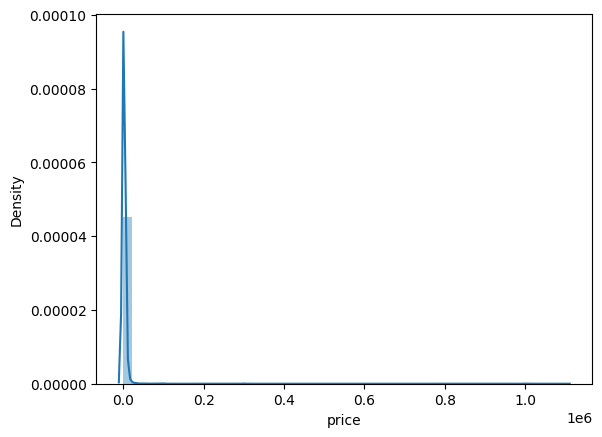

In [123]:
# Distplot from Price

sns.distplot(df['price'])

<Axes: xlabel='minimum_nights', ylabel='Density'>

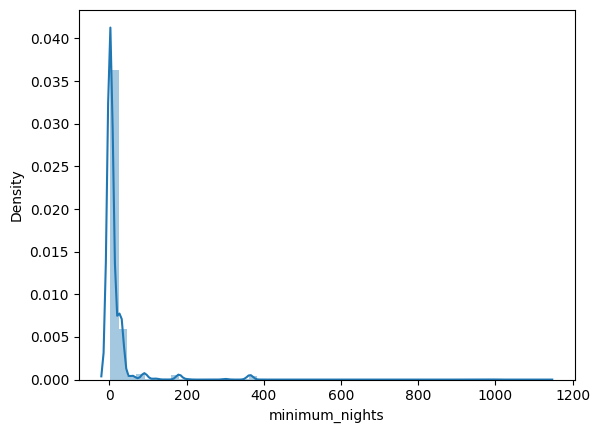

In [122]:
# Distplot from Minimum Nights

sns.distplot(df['minimum_nights'])

<Axes: xlabel='number_of_reviews', ylabel='Density'>

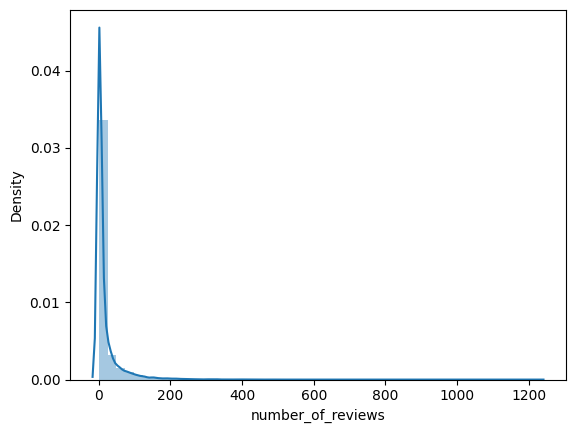

In [121]:
# Distplot from Number of Reviews

sns.distplot(df['number_of_reviews'])

<Axes: xlabel='calculated_host_listings_count', ylabel='Density'>

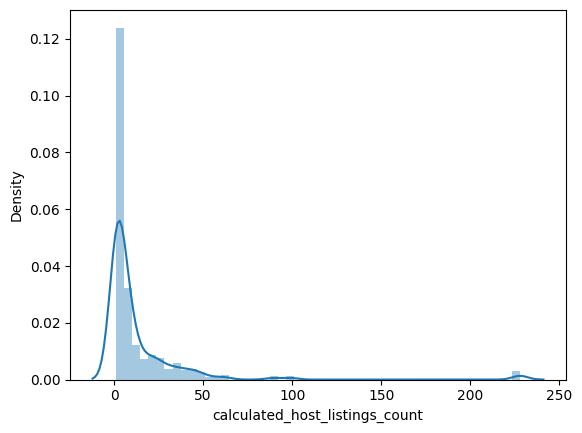

In [120]:
# Distplot from Calculated Host Listings Count

sns.distplot(df['calculated_host_listings_count'])

<Axes: xlabel='availability_365', ylabel='Density'>

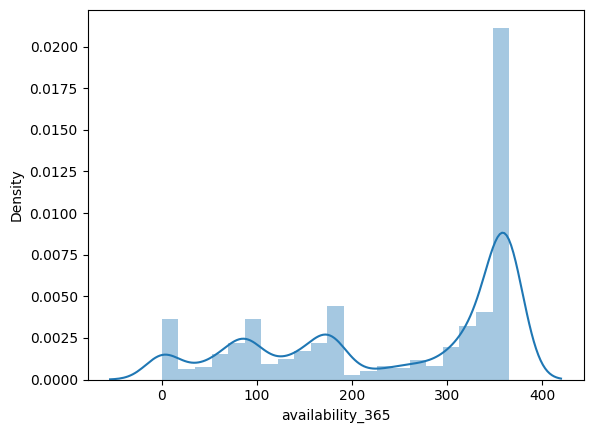

In [119]:
# Distplot from Availability in a Year

sns.distplot(df['availability_365'])

Outlier tersebut menunjukkan distribusi tidak normal.

<Axes: xlabel='number_of_reviews_ltm', ylabel='Density'>

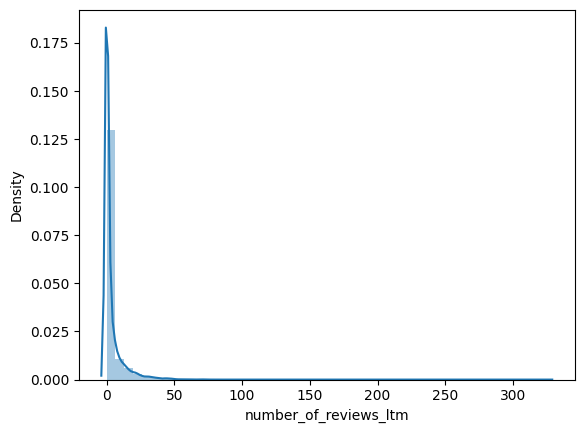

In [118]:
# Distplot from 'number_of_reviews_ltm'

sns.distplot(df['number_of_reviews_ltm'])

Berdasarkan 6 distribution plot di atas, outliers pada semua column adalah **right-skewed**, kecuali column 'availability_365'. Hal tersebut menunjukkan bahwa sebagian besar data memiliki value yang lebih rendah dibandingkan data berada di sisi kanan dengan value yang lebih tinggi. Dengan outliers di atas, diputuskan untuk tidak menghapusnya agar tetap menggambarkan integritas data.

### **d. Add column baru 'reviews_category' dan finalisasi table setelah data cleansing**

In [140]:
# To get unique value from column "reviews_per_month" in decimal
unique_values = df['reviews_per_month'].unique()
unique_values_decimal = [float("{:.2f}".format(val)) for val in unique_values]

# To sort ascending
unique_values_decimal.sort()

# Print
print(unique_values_decimal)


[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.

In [183]:
# Create new column 'review_category'
def categorize_review(value):
    if value == 0.0:
        return 'Tidak ada review'
    elif 0.01 <= value <= 5.0:
        return 'Sangat buruk'
    elif 5.01 <= value <= 10.0:
        return 'Cukup'
    elif 10.01 <= value <= 15.0:
        return 'Baik'
    elif 16.0 <= value <= 20.0:
        return 'Sangat baik'

# Apply function cateogory to new column 'review_category'
df['review_category'] = df['reviews_per_month'].apply(categorize_review)

# Print with new column 'review_category'
df


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,review_category
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06 00:00:00,0.50,2,353,0,Sangat buruk
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0-0-0000,0.00,2,358,0,Tidak ada review
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0-0-0000,0.00,1,365,0,Tidak ada review
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01 00:00:00,0.03,1,323,1,Sangat buruk
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0-0-0000,0.00,3,365,0,Tidak ada review
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0-0-0000,0.00,1,362,0,Tidak ada review
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0-0-0000,0.00,14,365,0,Tidak ada review
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0-0-0000,0.00,14,365,0,Tidak ada review
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0-0-0000,0.00,14,365,0,Tidak ada review


Berdasarkan code di atas, range review dari column 'reviews_per_month' adalah 0.0 hingga 19.13. Oleh karena itu, diklasifikasikan kategori ulasan berdasarkan column 'reviews_per_month':
- 0.0 = Tidak ada review
- 0.01 - 5.0 = Sangat buruk
- 6.0 - 10.0 = Cukup
- 11.0 - 15.0 = Baik
- 16.0 - 20.0 = Sangat baik 

#### To save in format csv and xlxs

In [189]:
# To save Cleaned Dataset to format .csv

df.to_csv('Cleaned_AirbnbListingsBangkok.csv')

In [186]:
# To save Cleaned Dataset to format .xlsx

!pip install openpyxl
df.to_excel('Cleaned_AirbnbListingsBangkok.xlsx')


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### **e. Data Visualization in VSCode**


In [147]:
#To know unique from each column

df.nunique()

id                                15854
name                              14795
host_id                            6659
host_name                          5313
neighbourhood                        50
latitude                           9606
longitude                         10224
room_type                             4
price                              3040
minimum_nights                       86
number_of_reviews                   298
last_review                        1670
reviews_per_month                   514
calculated_host_listings_count       50
availability_365                    366
number_of_reviews_ltm                85
review_category                       5
dtype: int64

#### 1. Top 5 Penginapan berdasarkan Distrik

In [148]:
#To see total rows in column 'neighbourhood'
total_rows= len(df['neighbourhood'].index)
print("Total baris dari column 'neighbourhood':", total_rows)

#To see total unique value in column 'neighbourhood'
total_uv= df['neighbourhood'].nunique()   
print("Unique value dari column 'neighbourhood: ",total_uv )    

Total baris dari column 'neighbourhood': 15854
Unique value dari column 'neighbourhood:  50


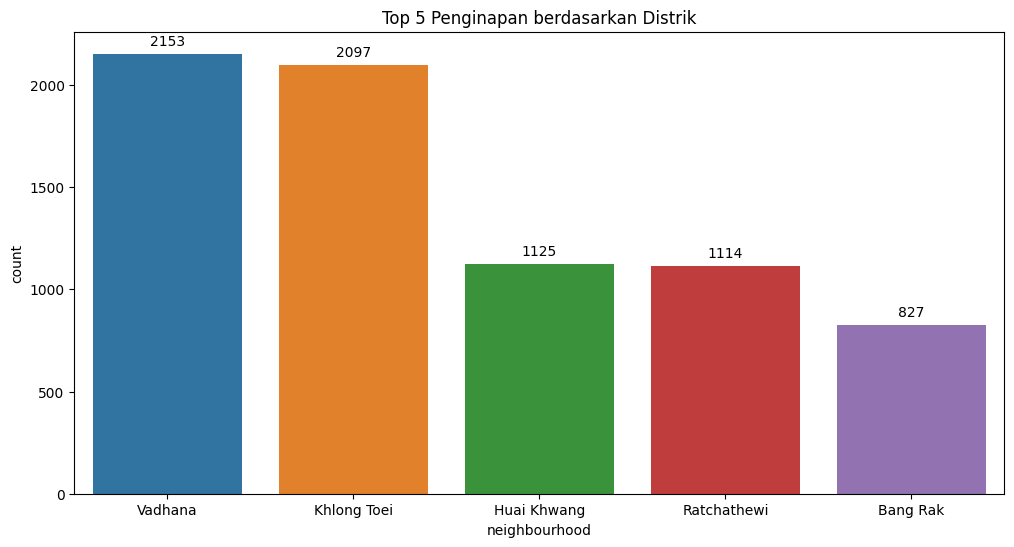

In [168]:
# Countplot size
plt.figure(figsize=(12, 6))

# Code to create countplot
top5_neigbourhood = sns.countplot(x='neighbourhood', data=df, order=df['neighbourhood'].value_counts().index[:5])

# Title
plt.title('Top 5 Penginapan berdasarkan Distrik')

# To make X-Axis easier to read
plt.xticks(rotation=0)

# Display the number
for p in top5_neigbourhood.patches:
    top5_neigbourhood.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 9), textcoords='offset points')

# Show the plot
plt.show()


Berdasarkan code di atas, dilakukan riset pada sumber yang terpecaya di internet untuk mengetahui karakteristik setiap distrik di atas

1. **Vadhana**: Vadhana dikenal karena menjadi pusat perbelanjaan dan hiburan di Bangkok, terutama dengan kawasan seperti Thonglor dan Ekamai yang terkenal dengan restoran, klub malam, dan gaya hidup mewah.

2. **Khlong Toei**: Khlong Toei terkenal sebagai pusat perdagangan dan komersial, dengan Terminal Ekspedisi Ekamai dan Pasar Khlong Toei yang sangat sibuk. Juga merupakan lokasi stasiun kereta api utama di Bangkok.

3. **Huai Khwang**: Huai Khwang dikenal sebagai pusat hiburan malam, terutama dengan area Ratchada yang terkenal dengan klub malam, restoran, dan bioskop.

4. **Ratchatewi**: Ratchatewi dikenal sebagai kawasan yang strategis dengan akses mudah ke pusat perbelanjaan populer seperti MBK Center dan Siam Paragon. Juga terkenal dengan pusat-pusat pendidikan dan akses transportasi yang baik.

5. **Bang Rak**: Bang Rak adalah pusat bisnis dan keuangan Bangkok, dengan Sky Bar di salah satu hotel mewahnya yang menawarkan pemandangan indah kota Bangkok.

Berdasarkan 5 distrik di atas, terdapat banyak penginapan di sana karena penyewa ingin meningkatkan probabilitas potensial tamu dengan memiliki penginapan di pusat perbelanjaan, hiburan malam, pusat bisnis, dan pusat perdagangan. 

#### 2. Top 5 Distrik dengan Total Ulasan Terendah (12 Bulan Terakhir)

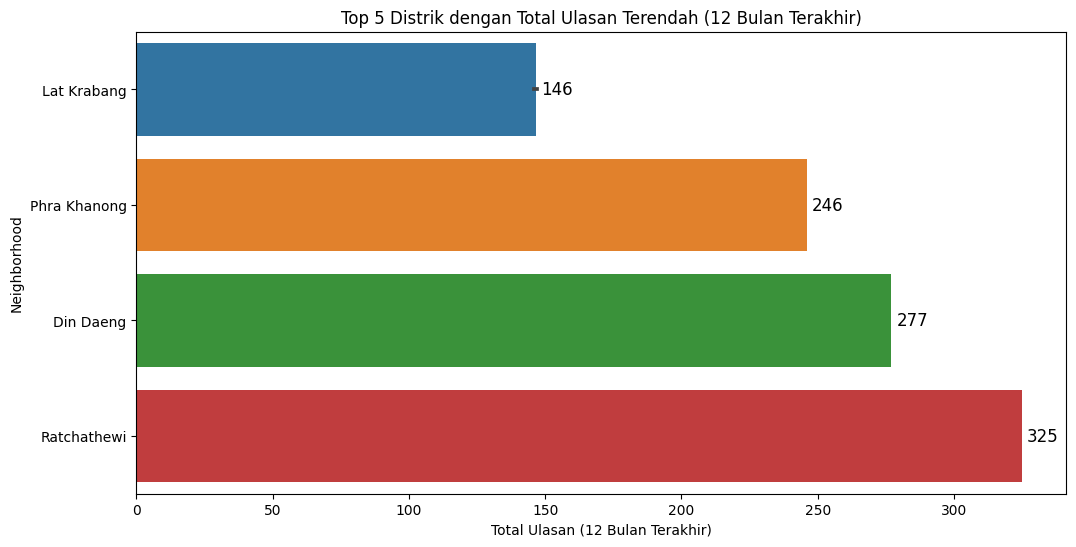

In [187]:
# Sort the DataFrame by total reviews in the last 12 months in ascending order
bottom_5_neighbourhoods = df.sort_values(by='number_of_reviews_ltm').tail(5)

# Create a bar plot for the bottom 5 neighbourhoods
plt.figure(figsize=(12, 6))

# Code to create barplot
ax = sns.barplot(x='number_of_reviews_ltm', y='neighbourhood', data=bottom_5_neighbourhoods)

# Title
plt.title('Top 5 Distrik dengan Total Ulasan Terendah (12 Bulan Terakhir)')

# X-Axis title
plt.xlabel('Total Ulasan (12 Bulan Terakhir)')

# Y-Axis title
plt.ylabel('Neighborhood')

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=12, color='black', xytext=(15, 0),
                textcoords='offset points')

# Show the bar plot
plt.show()

Berdasarkan data di atas, Lat Krabang mendapatkan total ulasan paling sedikit selama 12 bulan terakhir.

Tentu, berikut penjelasan singkat tentang kepopuleran masing-masing distrik di Bangkok:

1. **Lat Krabang**: Lat Krabang dikenal sebagai kawasan yang menghubungkan dengan Bandara Internasional Suvarnabhumi.

2. **Phra Khanong**: Phra Khanong adalah area perkotaan yang berkembang pesat dengan beragam tempat makan, kafe, dan gaya hidup malam yang menarik. Terutama dikenal dengan suasana kreatif dan modern.

3. **Din Daeng**: Din Daeng dikenal sebagai kawasan yang hidup dan sibuk dengan beragam kegiatan komersial dan bisnis. Terletak di dekat pusat kota, ini juga merupakan tempat banyak acara dan pertunjukan.

4. **Ratchatewi**: Ratchatewi dikenal sebagai kawasan yang strategis dengan akses mudah ke pusat perbelanjaan populer seperti MBK Center dan Siam Paragon. Juga terkenal dengan pusat-pusat pendidikan dan akses transportasi yang baik.

Melalui penjelasan ini, korelasi antara mengapa 5 distrik di atas memiliki ulasan terrendah adalah sebagai berikut:

1. **Lat Krabang**: Dekat dengan Bandara Internasional Suvarnabhumi. Banyak tamu yang menginap di sini mungkin adalah wisatawan transit atau menginap singkat karena aksesibilitas ke bandara sehingga para tamu yang menginap adalah yang memiliki waktu yang terbatas.

2. **Phra Khanong**: Sedikit ulasan karena terletak di pusat kuta dengan menyediakan berbagai macam hiburan yang mengakibatkan para tamu tida memiliki waktu untuk mengisi ulasan.

3. **Din Daeng**: Sedikit ulasan karena terletak di pusat kuta dengan menyediakan berbagai macam hiburan yang mengakibatkan para tamu tida memiliki waktu untuk mengisi ulasan.

4. **Ratchathewi**: Ratchathewi terletak di pusat kota dengan berbagai macam hiburan. Tamu yang menginap sibuk karena mereka memiliki agenda padat selama kunjungan, sehingga tidak ada waktu untuk memberikan ulasan setelah menginap.


### **f. Data Visualization in Tableau**

Berikut link Tableau Public:

https://public.tableau.com/views/AirbnbReviewListingsBangkok/StoryAirbnbListingsReviewBangkok?:language=en-US&:display_count=n&:origin=viz_share_link

### **g. Conclusion dan Recommendations**

#### Conclusion
Berikut merupakan kesimpulan dari insights dari Visual Studio Code dan Tableau, 
1. Vadhana dan Ratchathewi merupakan distrik dengan penginapan terbanyak dan juga tidak mendapatkan review, yang mendapatkan ulasan  sangat buruk, dan ulasan terendah selama 12 bulan terakhir.


2. Distrik Vadhana merupakan top 1 distrik dengan penginapan terbanyak di Bangkok tetapi memiliki review category 'Tidak Ada Review' dan 'Sangat Buruk'. Hal tersebut disebabkan oleh tamu yang tidak memiliki waktu akibat letak Vadhana yang strategis akan pusat perbelanjaan dan hiburan, khususnya Thonglor dan Ekamai. Para tamu lebih banyak mengalokasi waktu untuk mengeksplor Vadhana dibandingkan mengisi ulasan.

Untuk mengetahui penginapan mana saja di Vadhana yang memiliki total ulasan terendah selama 12 bulan, maka dicari berdasarkan host ID. Berikut merupakan 5 host ID terendah:
1. 485313876
2. 474260020
3. 465486937
4. 456119431
5. 449012324

3. Distrik Ratchathewi merupakan top 4 distrik dengan penginapan terbanyak di Bangkok tetapi memiliki total ulasan terendah selama 12 bulan terakhir. Hal tersebut disebabkan oleh tamu yang tidak memiliki waktu setelah menginap karena Ratchathewi terletak di pusat kota dengan berbagai tempat yang menghibur. Yang terkenal dari distrik ini adalah MBK Center dan Siam Paragon. 

Untuk mengetahui penginapan mana saja di Ratchathewi yang memiliki total ulasan terendah selama 12 bulan, maka dicari berdasarkan host ID. Berikut merupakan 5 contoh host ID terendah:
1. 153793
2. 595560
3. 4117536
4. 5115355
5. 5357273


#### Recommendations:
1. Bagi Airbnb & penyewa:
- Untuk yang mendapatkan 
- Airbnb menghubungi penyewa yang memiliki unit dengan review 'sangat buruk' dan 'tidak ada review'. Hal tersebut dilakukan agar host meningkatkan kualitas unitnya. Apabila tidak dilaksanakan dalam waktu tertentu, maka Airbnb memiliki otoritas untuk memutuskan hubungan dengan host. Pihak Airbnb juga harus mengawasi setiap progress dari host terhadap unitnya.



2. Bagi tamu:
- Airbnb memberi pesan reminder melalui e-mail aplikasi dari guest setelah mereka menginap
- Tamu yang memberikan review mampu mendapatkan tambahan poin sehingga tamu juga akan mendapatkan benefit dua arah
- Saat guest hendak memberi review, guest diberi sebuah penjelasan bahwa review harus ditulis secara jujur dan host tidak mampu mengganggu gugat atas review tersebut

